<a href="https://colab.research.google.com/github/kcw0331/Environmental-Health-Big-Data-Analysis/blob/main/14%EC%A3%BC%EC%B0%A8/Test_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

먼저 본 문제지를 본인의 google drive 에 저장한 후 연습을 수행하세요.

File -> Save a copy in drive


In [1]:
import pandas as pd
import numpy as np

## Pre-test, Python

구글드라이브 연동 후 아래의 repository 를 google drive 에서 clone 해두세요. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [6]:
!git clone https://github.com/wesm/pydata-book.git

fatal: destination path 'pydata-book' already exists and is not an empty directory.


In [7]:
cd pydata-book

/content/drive/MyDrive/pydata-book


### 테스트 데이터는 미국 신생아 이름 데이터입니다. 

파일들을 확인해보면 아래와 같습니다.

In [8]:
ls datasets/babynames

NationalReadMe.pdf  yob1906.txt  yob1933.txt  yob1960.txt  yob1987.txt
yob1880.txt         yob1907.txt  yob1934.txt  yob1961.txt  yob1988.txt
yob1881.txt         yob1908.txt  yob1935.txt  yob1962.txt  yob1989.txt
yob1882.txt         yob1909.txt  yob1936.txt  yob1963.txt  yob1990.txt
yob1883.txt         yob1910.txt  yob1937.txt  yob1964.txt  yob1991.txt
yob1884.txt         yob1911.txt  yob1938.txt  yob1965.txt  yob1992.txt
yob1885.txt         yob1912.txt  yob1939.txt  yob1966.txt  yob1993.txt
yob1886.txt         yob1913.txt  yob1940.txt  yob1967.txt  yob1994.txt
yob1887.txt         yob1914.txt  yob1941.txt  yob1968.txt  yob1995.txt
yob1888.txt         yob1915.txt  yob1942.txt  yob1969.txt  yob1996.txt
yob1889.txt         yob1916.txt  yob1943.txt  yob1970.txt  yob1997.txt
yob1890.txt         yob1917.txt  yob1944.txt  yob1971.txt  yob1998.txt
yob1891.txt         yob1918.txt  yob1945.txt  yob1972.txt  yob1999.txt
yob1892.txt         yob1919.txt  yob1946.txt  yob1973.txt  yob2000.txt
yob189

### Q1. 폴더로부터 1880년도부터 2011년도 데이터를 읽어 하나의 통합데이터로 만들어보세요.

In [10]:
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


### Q2. 1900 년도에 태어난 남자, 여자 이름 top 5개를 알려주세요.


In [36]:
def get_top5(group):
    return group.sort_values(by='births', ascending=False)[:5]

grouped = names.groupby(['year', 'sex'])
top5 = grouped.apply(get_top5)
top5.reset_index(inplace=True, drop=True)

In [37]:
boys = top5[top5.sex == 'M']
girls = top5[top5.sex == 'F']

In [38]:
boys[boys.year == 1990]

,name,sex,births,year
1105,Michael,M,65268,1990
1106,Christopher,M,52314,1990
1107,Matthew,M,44788,1990
1108,Joshua,M,43209,1990
1109,Daniel,M,33794,1990


In [39]:
girls[girls.year == 1990]

,name,sex,births,year
1100,Jessica,F,46459,1990
1101,Ashley,F,45544,1990
1102,Brittany,F,36532,1990
1103,Amanda,F,34391,1990
1104,Samantha,F,25864,1990


### Q3. 연도별 태어난 남여 인구수를 비교하는 그래프를 그려보세요

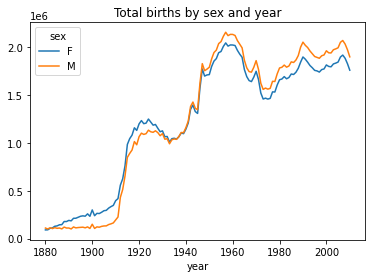

In [35]:
total_births = names.pivot_table('births', index='year',
                                 columns='sex', aggfunc=sum)
total_births.tail()
total_births.plot(title='Total births by sex and year')

### Q4. 주어진 성별의 이름에 대해서 태어난 아동 수의 line 플롯을 그려주는 함수를 작성하세요. 
  - 하나의 이름만 받아서 line style 은 파란색의 실선으로 그려주는 함수를 작성하세요.  
  - 여러 이름을 입력받아서 subplot으로 각 이름들 별로 그림을 그리는 함수를 만들어보세요. line style 은 각 subplot 별로 달라도 좋습니다.

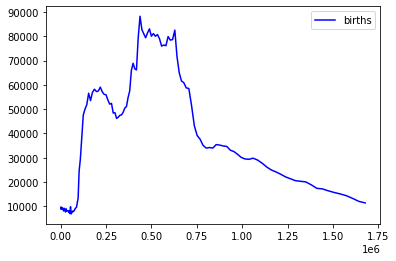

In [40]:
names.loc[names.name=="John"].loc[names.sex == "M"].plot(kind = "line", y = "births", style = "-b")

In [ ]:
def plotnm(nm, sx):
  names.loc(

### Q5. 남자 여자 이름 모두 쓰이는 이름을 찾아서 연도별 패턴을 시각화 해 보고자 합니다. 아래의 절차를 수행하세요.

 - 1900 년도에 1000개이상 쓰인 이름들을 추려보세요.
 - 추려진 data의 이름들에 대해서 value_conts 함수를 썼을 때 2 가 나오는 이름들은 남, 여 모두에서 1000회 이상 쓰인 이름입니다. 
 - 앞에서 확인한 이름으로 남자 여자별로 연도별 이름사용횟수를 그려주는 시각화를 수행해보세요.
 - 해당 그래플를 해석해서 story를 설명해보세요